In [1]:
import scipy.io.wavfile
import os
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import periodogram, spectrogram

import sounddevice as sd

In [2]:
file_name = "why_we_get_mad_1.wav"
file_path = os.path.join("data", file_name)

In [3]:
samplerate, waveform = scipy.io.wavfile.read(file_path)

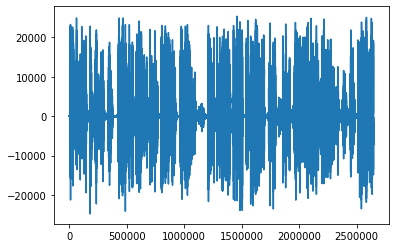

In [4]:
plt.plot(waveform)
plt.show()

In [71]:
sd.play(waveform)
sd.wait()

window chars:

B aka wsize - length of window in points of wav


A aka wstep - distance between begin points of current and prev window in points of wav

In [51]:
current_pos = 7000
wsize = 3000
wstep = 1500

total_windws = len(waveform) / wstep - wsize / wstep
total_windws

1762.0

In [52]:
len(waveform) / 60

44100.0

### Sample 1

In [53]:
def plot_waveform(wf):
    fig, ax = plt.subplots(figsize=(15,7))
    ax.plot(wf)
    plt.show()

In [54]:
wslice = waveform[current_pos:current_pos + wsize]

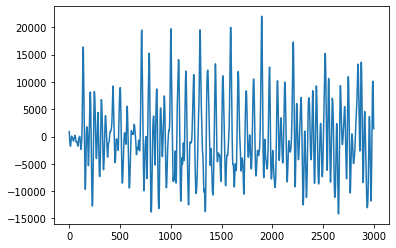

In [55]:
plt.plot(wslice)
plt.show()

In [56]:
def plot_pgram(wf):
    sample_freqs, pgram = scipy.signal.periodogram(wf)
    fig, ax = plt.subplots(figsize=(15,7))
    ax.stem(sample_freqs*44100, pgram, use_line_collection=True)
    plt.xlim(0, 5000)
    plt.show()

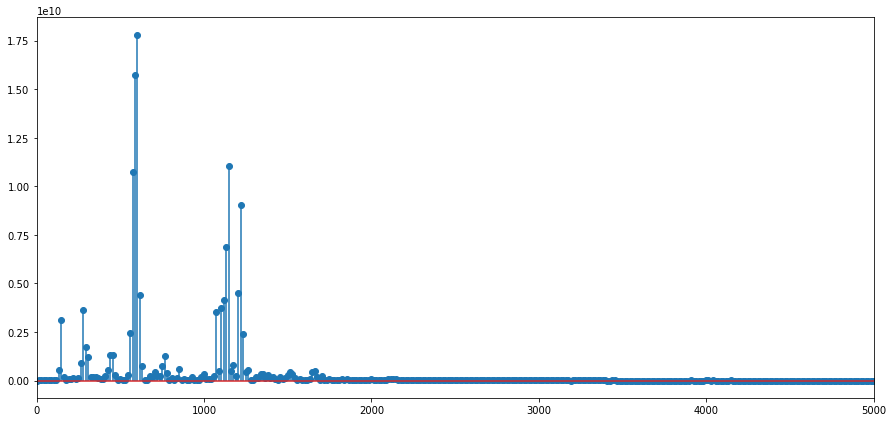

In [57]:
sample_freqs, pgram = scipy.signal.periodogram(wslice)
fig, ax = plt.subplots(figsize=(15,7))
ax.stem(sample_freqs*44100, pgram, use_line_collection=True)
plt.xlim(0, 5000)
plt.show()

In [58]:
#glitch on initial run, but ok on next
sd.play(wslice)
sd.wait()

### Sample 2

In [59]:
current_pos += wstep
wslice = waveform[current_pos:current_pos + wsize]
current_pos

8500

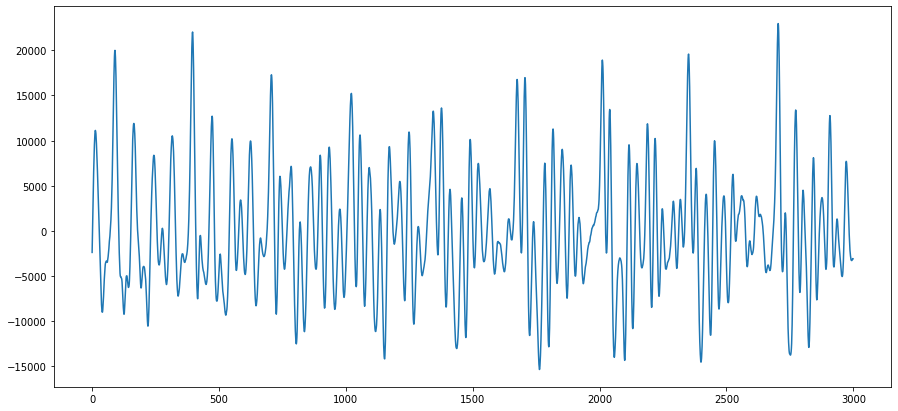

In [60]:
plot_waveform(wslice)

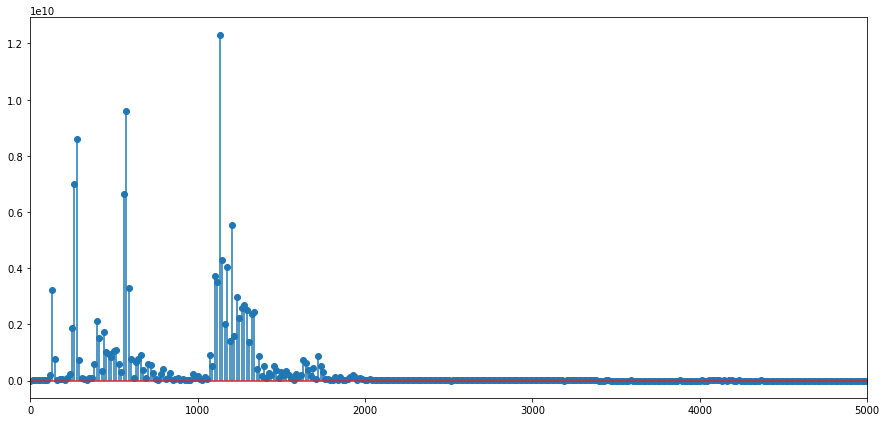

In [61]:
plot_pgram(wslice)

In [62]:
sd.play(wslice)
sd.wait()

### Sample 3

In [63]:
current_pos += wstep
wslice = waveform[current_pos:current_pos + wsize]
current_pos

10000

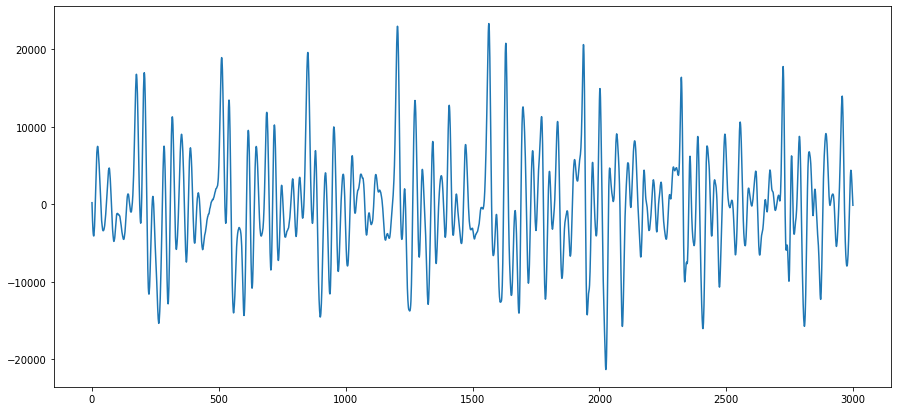

In [64]:
plot_waveform(wslice)

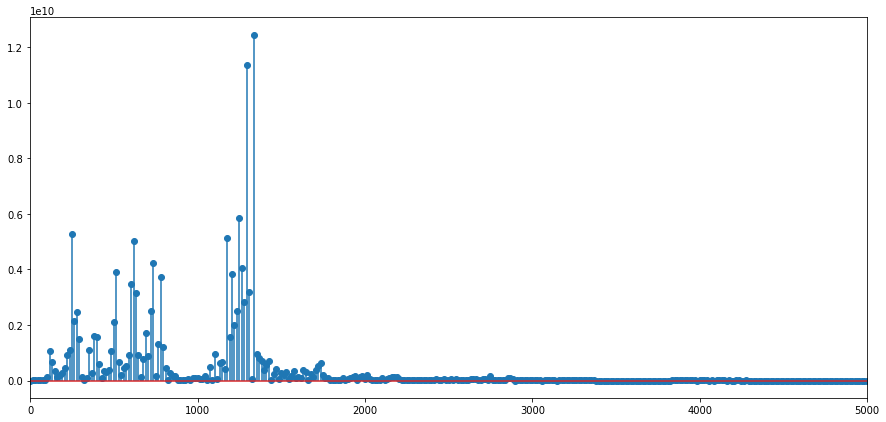

In [65]:
plot_pgram(wslice)

In [66]:
sd.play(wslice)
sd.wait()

### Sample 4

In [67]:
current_pos += wstep
wslice = waveform[current_pos:current_pos + wsize]
current_pos

11500

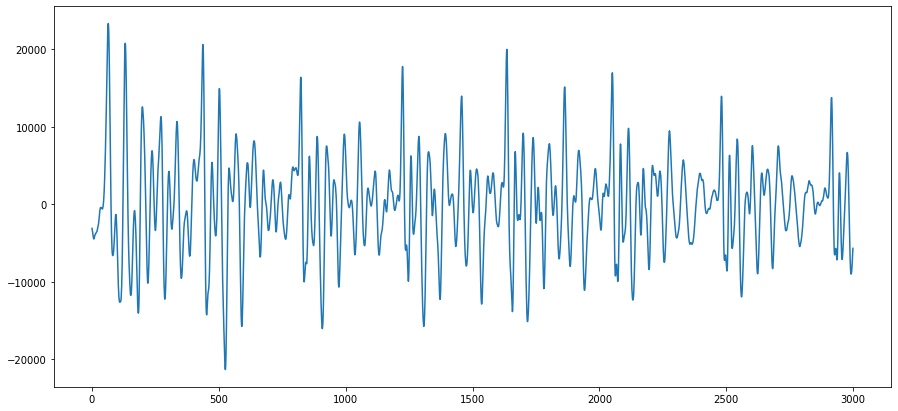

In [68]:
plot_waveform(wslice)

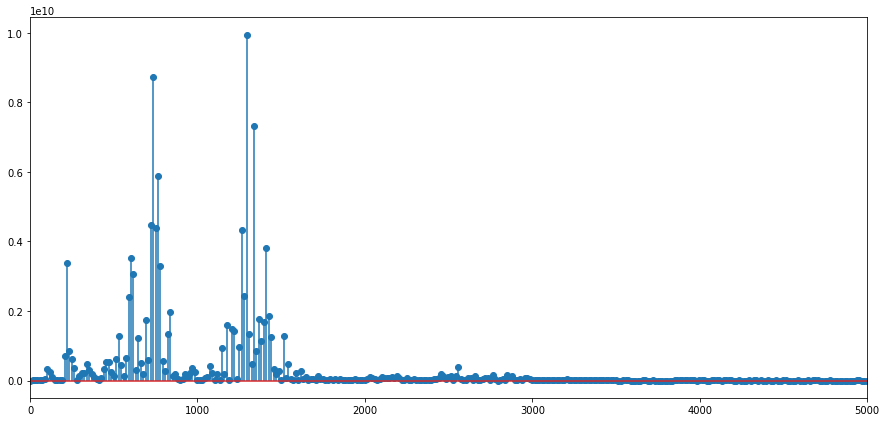

In [69]:
plot_pgram(wslice)

In [72]:
sd.play(wslice)
sd.wait()

### Sample 5

In [73]:
current_pos += wstep
wslice = waveform[current_pos:current_pos + wsize]
current_pos

13000

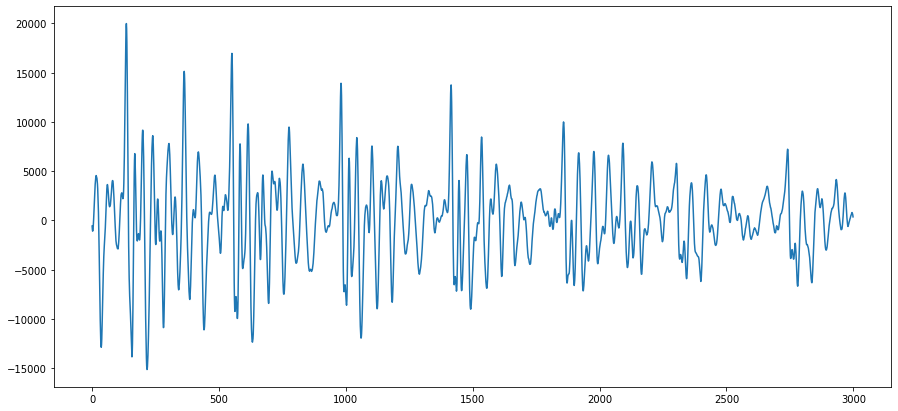

In [74]:
plot_waveform(wslice)

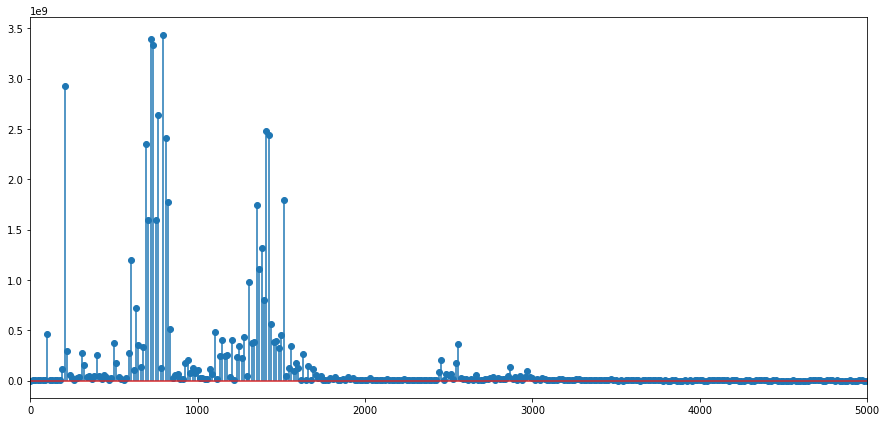

In [75]:
plot_pgram(wslice)

In [76]:
sd.play(wslice)
sd.wait()

In [94]:
sample_freqs, pgram = scipy.signal.periodogram(wslice)
pgram.mean()

37207468.0

In [95]:
pgram.std()

253765470.0

In [96]:
pgram.max()

3436522000.0

In [99]:
sample_freqs, pgram = scipy.signal.periodogram(wslice)
clean_pgram = np.zeros(pgram.shape)

for i, elem in enumerate(pgram):
    if elem > pgram.std():
        clean_pgram[i] = elem

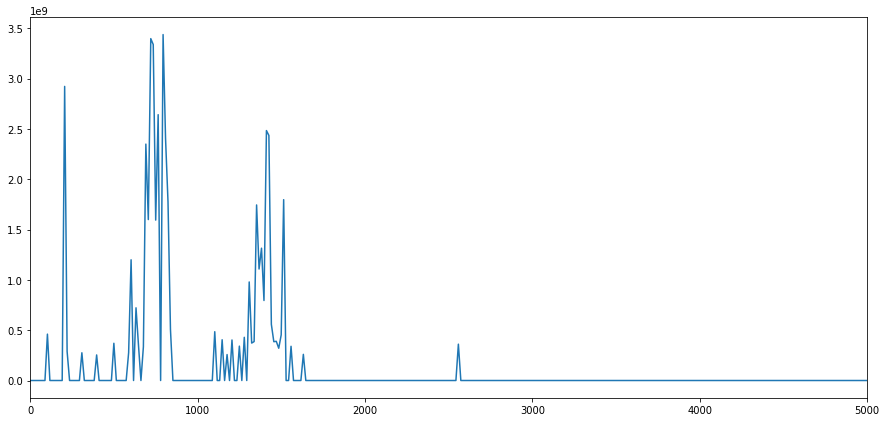

In [101]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(sample_freqs*44100, clean_pgram)
#ax.stem(sample_freqs*44100, clean_pgram, use_line_collection=True)
plt.xlim(0, 5000)
plt.show()

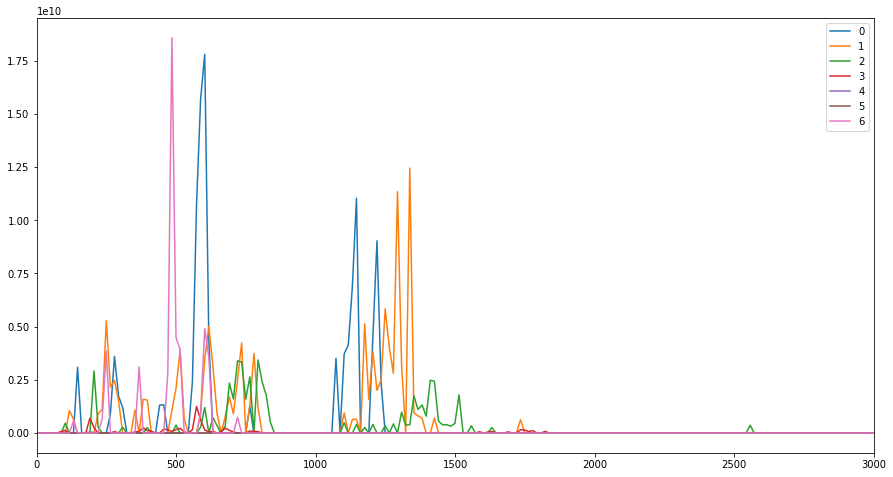

In [120]:
num_slices = 7
pgram_list = []
current_pos = 7000
wsize = 3000
wstep = 3000
fig, ax = plt.subplots(figsize=(15,8))

for j in range(num_slices):
    wslice = waveform[current_pos:current_pos + wsize]
    sample_freqs, pgram = scipy.signal.periodogram(wslice)
    clean_pgram = np.zeros(pgram.shape)
    
    for i, elem in enumerate(pgram):
        if elem > pgram.std():
            clean_pgram[i] = elem
    
    ax.plot(sample_freqs*44100, clean_pgram, label=str(j))
    ax.legend()
    current_pos += wstep

plt.xlim(0,3000)
plt.show()

In [121]:
current_pos = 7000
wsize = 3000
wstep = 3000

In [124]:
num_slices = 10
slice_list = []

for i in range(num_slices):
    wslice = waveform[current_pos:current_pos + wsize]
    slice_list.append(wslice)
    
len(slice_list)

10